# NumPy

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/2.NumpyExcercise.ipynb)

(Based on https://cs231n.github.io/python-numpy-tutorial/)

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the numpy package:

In [1]:
import numpy as np

## 1. Creating Arrays
A numpy array is a grid of values, all of the same type. Numpy arrays, like Python arrays, are indexed starting from zero. The number of dimensions is the rank of the array. The shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [4]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [5]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [6]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [7]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [8]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.84665641 0.98996553]
 [0.78205354 0.07444546]]


## 2. Slicing
In addition to accessing array elements one at a time, Python provides concise syntax to access subarrays. This is known as slicing:

In [9]:
nums = np.arange(5)   # arange is a numpy function that creates an array with evenly spaced values within a given interval
print(nums)           # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])      # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])       # Get a slice from index 2 to the end; prints "[2, 3, 4]"
nums[2:4] = [8, 9]    # Assign a new sublist to a slice
print(nums)           # Prints "[0, 1, 8, 9, 4]"

[0 1 2 3 4]
[2 3]
[2 3 4]
[0 1 8 9 4]


We can also change the shape of arrays:

In [10]:
nums = np.arange(12)
print (nums.reshape((3, 4)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Let's practice:
- Use the np.arange function to create a rank 1 numpy array with entries going from 1 to 20
- The respape the array into a 2x10 array of rank 2

In [11]:
# Create the array

# Reshape the array


## 3. Boolean array indexing
Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [12]:
a = np.arange(1,7,1).reshape((3,2))
print(a)

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[1 2]
 [3 4]
 [5 6]]
[[False False]
 [ True  True]
 [ True  True]]


In [13]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

[3 4 5 6]


In [14]:
# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]


Boolean array indexing is particularly useful to split data sets into training and testing data, which is commonly done in machine learning to accurately estimate the prediction error of a model.

We can for example, randomly shuffle the indices of an array and then select a fraction of the entries for training and the remainder for testing.

In [15]:
index = np.arange(10)         # Creates an index array of size 10
print("Index array =        ", index)
np.random.shuffle(index)      # Randomly shuffles the entries of the array
print("Shuffled index array=", index)

data = np.random.random(10)   # Create a data array of size 10
print("Data array = \n", data)

training_data = data[index<8]
testing_data  = data[index>=8]

print ("Random training data = \n", training_data)
print ("Random testing data  = \n", testing_data)

Index array =         [0 1 2 3 4 5 6 7 8 9]
Shuffled index array= [6 3 2 7 9 4 5 1 0 8]
Data array = 
 [0.49286661 0.33454777 0.60092002 0.41047255 0.63606798 0.93151659
 0.97588557 0.15983686 0.03152332 0.69250434]
Random training data = 
 [0.49286661 0.33454777 0.60092002 0.41047255 0.93151659 0.97588557
 0.15983686 0.03152332]
Random testing data  = 
 [0.63606798 0.69250434]


## 4. Array math
Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [16]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [17]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# You can also use the @ operator which is equivalent to numpy's dot operator.
print(v @ w)

219
219
219


## 5. Linear Regression

(See https://en.wikipedia.org/wiki/Simple_linear_regression)

In linear regression, we fit a linear function to a dataset of $N$ data points $(x_i, y_i)$:
$$
y = \alpha + \beta x.
$$

To evaluate the coefficients for linear regression for a set , we first evaluate the mean of the $x$ and $y$ values:
$$
\bar x = \frac{1}{N} \sum_{i=1}^N x_i
$$
and
$$
\bar y = \frac{1}{N} \sum_{i=1}^N y_i
$$
We then calculate the mean deviation of $x$ and the cross-deviation for $x$ and $y$,
$$
S^2_x = \sum_{i=1}^N (x_i - \bar x)^2
$$
and
$$
S_{x,y} = \sum_{i=1}^N (x_i - \bar x)(y_i - \bar y).
$$

Finally, the coefficients for the linear regression equation are given by
$$
\beta = \frac{S_{x,y}}{S_x^2}
$$
and
$$
\alpha = \bar y - \beta \bar x.
$$

Estimated coefficients:
 alpha = 1.2363636363636363         
 beta =  1.1696969696969697


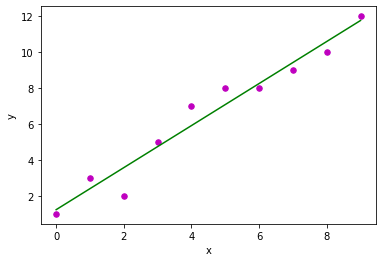

In [18]:
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    S_xy = np.sum(y*x) - n*m_y*m_x
    S_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    beta = S_xy / S_xx
    alpha = m_y - beta*m_x
 
    return (alpha, beta)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 

# observations / data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
 
# estimating coefficients
[alpha, beta] = estimate_coef(x, y)
print("Estimated coefficients:\n alpha = {}  \
       \n beta =  {}".format(alpha, beta))
 
# plotting regression line
plot_regression_line(x, y, [alpha, beta])

The goodness of the linear fit is usually described the *coefficient of determination*, $R^2$, given by
$$
R = \frac{(\bar{xy} - \bar x \bar y)^2}{\left ( \bar {x^2} - {\bar x}^2\right ) \left ( \bar {y^2} - {\bar y}^2\right )}.
$$

Extend the code to evaluate $R^2$.

Estimated coefficients:
 alpha = 1.2363636363636363         
 beta  = 1.1696969696969697
 R2    = 0.9073287150065824


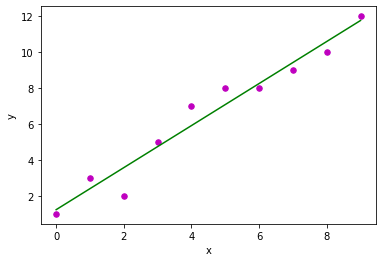

In [19]:
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    S_xy = np.sum((y-m_y)*(x-m_x))
    S_xx = np.sum((x-m_x)*(x-m_x))
 
    # calculating regression coefficients
    beta = S_xy / S_xx
    alpha = m_y - beta*m_x
 
    # Calculate R
    m_xy = np.mean(x*y)
    m_xx = np.mean(x*x)
    m_yy = np.mean(y*y)

    R = ((m_xy-m_x*m_y)**2/(m_xx - m_x*m_x)/(m_yy - m_y*m_y))**2

    return (alpha, beta, R)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 

# observations / data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
 
# estimating coefficients
[alpha, beta, R] = estimate_coef(x, y)
print("Estimated coefficients:\n alpha = {}  \
       \n beta  = {}\n R2    = {}".format(alpha, beta, R))
 
# plotting regression line
plot_regression_line(x, y, [alpha, beta])